<img src="https://github.com/LucaScaldaferri/Curso_Cientista_de_Dados/blob/main/logo_ebac.png?raw=true" alt="ebac-logo">


---

# **Profissão Cientista de Dados**
## **Módulo** 12 | Regressão I | Exercício 1
Resolução Caderno de **Exercícios**<br> 
Aluno [Lucas Scaldaferri Magalhães Freitas](https://www.linkedin.com/in/0scaldaferri-lucas/) <br>

---

# Regressão 01 - tarefa 01

### 1. Explorando a base de gorjetas

a. Na aula fizemos uma regressão de ```tip``` explicada por ```net_bill```. Carregue os pacotes e a base, crie as variáveis necessárias como na aula, e reproduza esta regressão.

b. Reproduza também o gráfico de dispersão dessas duas variáveis.

In [30]:
import pandas as pd
import numpy as np

import seaborn as sns
from seaborn import load_dataset

import matplotlib.pyplot as plt

import statsmodels.formula.api as smf

tips = sns.load_dataset("tips")
df = tips.rename(columns={'total_bill': 'total_conta',
                        'tip': 'gorjeta',
                        'sex': 'sexo',
                        'smoker': 'fumante',
                        'day': 'dia',
                        'time': 'periodo',
                        'size': 'tamanho'})
df.head()

,total_conta,gorjeta,sexo,fumante,dia,periodo,tamanho
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [31]:
df['gorjeta_pct'] = df['gorjeta'] / (df['total_conta'] - df['gorjeta'])
df['conta'] = df['total_conta'] - df['gorjeta']
df.head()

,total_conta,gorjeta,sexo,fumante,dia,periodo,tamanho,gorjeta_pct,conta
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204,15.98
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244,8.68
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886,17.51
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494,20.37
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069,20.98


(0.0, 10.5)

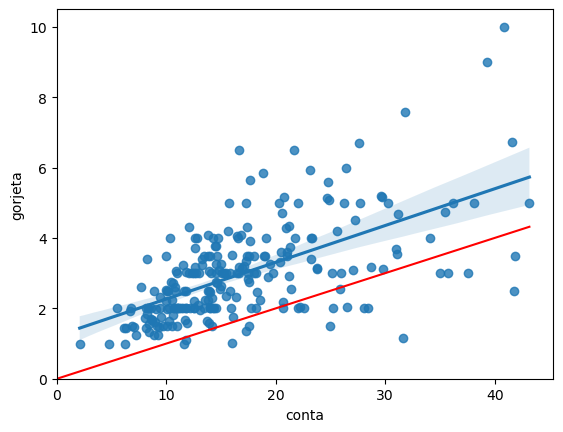

In [63]:
sns.regplot(y = 'gorjeta', x = 'conta', data = df[df['gorjeta_pct']<.5])

x = np.linspace(0,df['conta'].max(), 100)
y = .1*x
plt.plot(x, y, 'r')

plt.xlim(left = 0)
plt.ylim(bottom = 0)

### 2. Mudança de perspectiva

Agora ajuste um modelo de regressão de ```tip_pct``` por ```net_bill```. Construa o gráfico de dispersão correspondente.

In [97]:
reg = smf.ols('gorjeta_pct ~ conta', data = df[df['gorjeta_pct']<.5]).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            gorjeta_pct   R-squared:                       0.189
Model:                            OLS   Adj. R-squared:                  0.186
Method:                 Least Squares   F-statistic:                     56.10
Date:                Wed, 12 Apr 2023   Prob (F-statistic):           1.31e-12
Time:                        15:17:22   Log-Likelihood:                 331.48
No. Observations:                 242   AIC:                            -659.0
Df Residuals:                     240   BIC:                            -652.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2538      0.009     27.252      0.000       0.235       0.272
conta         -0.0037      0.000     -7.490      0.000      -0.005      -0.003
==============================================================================
Omnibus:                       25.646   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               31.523
Skew:                           0.764   Prob(JB):                     1.43e-07
Kurtosis:                       3.889   Cond. No.                         43.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [98]:
df['gorjeta_pct_prevista'] = reg.predict(df)
df

,total_conta,gorjeta,sexo,fumante,dia,periodo,tamanho,gorjeta_pct,conta,gorjeta_pct_prevista
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204,15.98,0.194125
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244,8.68,0.221392
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886,17.51,0.188410
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494,20.37,0.177727
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069,20.98,0.175448
...,...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,0.256166,23.11,0.167492
240,27.18,2.00,Female,Yes,Sat,Dinner,2,0.079428,25.18,0.159760
241,22.67,2.00,Male,Yes,Sat,Dinner,2,0.096759,20.67,0.176606
242,17.82,1.75,Male,No,Sat,Dinner,2,0.108899,16.07,0.193789


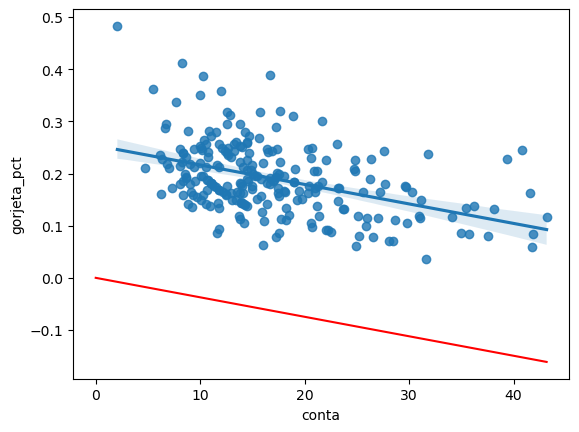

In [99]:
sns.regplot(y = 'gorjeta_pct', x = 'conta', data = df[df['gorjeta_pct']<.5])


x = np.linspace(0, df['conta'].max(), 100)
y = x * reg.params.conta
plt.plot(x, y, 'r')

### 3. Comente

Compare os dois gráficos e comente (de forma objetiva e suscinta) a relação entre eles e a diferença do ajuste. Podemos comparar diretamente os $R^2$s?

No primeiro gráfico é possível observar que quanto maior o valor da conta, maior será o percentual de gorjeta aplicado (correlação positiva). No entanto, o segundo gráfico representa o inverso (correlação negativa), ou seja, quanto maior o valor da conta, menor o percentual de gorjeta aplicado.<br>
É importante ressaltar que a maior das observações se encontram em contas com menor valor, desta forma, quanto maior o valor da conta menor a quantidade de observações.<br>
É possível e muito importate comparar diretamente o R² de ambos os modelos para avaliar qual possui a menor variação na resposta. Porém, visualmente é possível observar que a inclinicação da reta no primeiro gráfico é mais aproximada da reta da gorjeta, indicando que possivelmente tem menor variação na resposta.

### 4. Ajuste do modelo em outra escala

Com o modelo no item 3, obtenha a preditiva do valor da gorjeta:
  1. obtenha o valor predito ```pred``` para ```tip_pct``` (dica, veja o atributo ```reg.fittedvalues```)
  2. obtenha o valor predito para ```tip``` como ```tip_pct * net_bill```
  3. calcule o $R^2$ do modelo para ```tip```
  4. compare esse $R^2$ com o do item 1

In [84]:
# 4.1

pred = reg.fittedvalues
pred

0      0.207087
1      0.251951
2      0.197684
3      0.180107
4      0.176358
         ...   
239    0.163268
240    0.150546
241    0.178264
242    0.206534
243    0.208316
Length: 244, dtype: float64

In [105]:
# 4.2

pred * df['conta']

0      3.309254
1      2.186938
2      3.461450
3      3.668785
4      3.699998
         ...   
239    3.773120
240    3.790751
241    3.684707
242    3.319003
243    3.287232
Length: 244, dtype: float64

In [102]:
# 4.3 -> R² = 

dados = df.copy()
dados['gorjeta'] = dados['gorjeta_pct']*dados['conta']

reg2 = smf.ols('gorjeta ~ conta', data = dados).fit()
reg2.predict(dados)
reg2.fittedvalues

0      2.918050
1      2.192915
2      3.070031
3      3.354125
4      3.414719
         ...   
239    3.626300
240    3.831920
241    3.383925
242    2.926990
243    2.898184
Length: 244, dtype: float64

In [103]:
reg2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                gorjeta   R-squared:                       0.333
Model:                            OLS   Adj. R-squared:                  0.330
Method:                 Least Squares   F-statistic:                     120.6
Date:                Wed, 12 Apr 2023   Prob (F-statistic):           5.02e-23
Time:                        15:24:26   Log-Likelihood:                -375.63
No. Observations:                 244   AIC:                             755.3
Df Residuals:                     242   BIC:                             762.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.3307      0.168      7.907      0.000       0.999       1.662
conta          0.0993      0.009     10.980      0.000       0.082       0.117
==============================================================================
Omnibus:                       33.873   Durbin-Watson:                   2.123
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               59.942
Skew:                           0.754   Prob(JB):                     9.63e-14
Kurtosis:                       4.903   Cond. No.                         43.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

4.4

R² do modelo = 0.189 ou 18,90%<br>
R² de gorjeta * conta = 0,333 ou 33,33%

Embora ambos os coeficientes de determinação sejam baixos, o R² da gorjeta * conta se adequou melhor aos dados.